luminance = 76
dynamic = [52 , 154]
image contarst = 0.495
standard deviation using the formula which is given in the class = 437.516
standard deviation adding the square root to the given class formula = 20.917
standard deviation using the built in function = 20.917


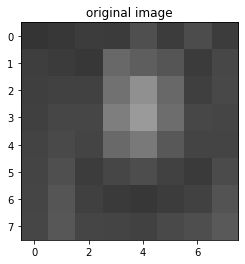

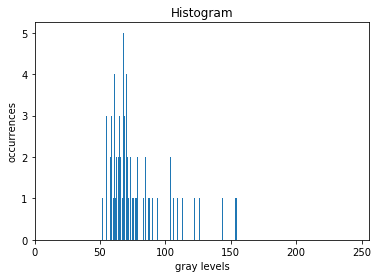

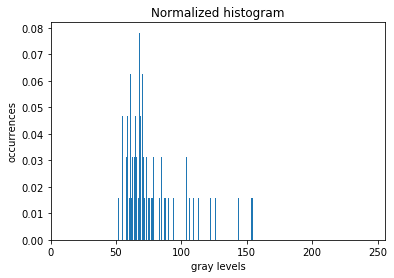

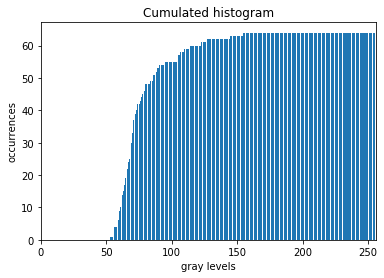

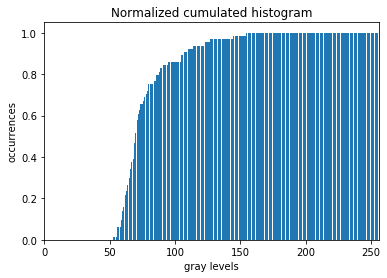

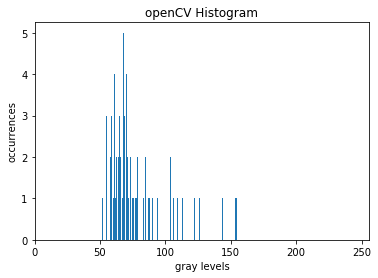

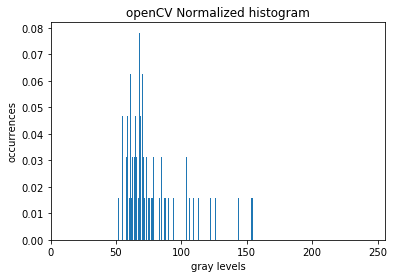

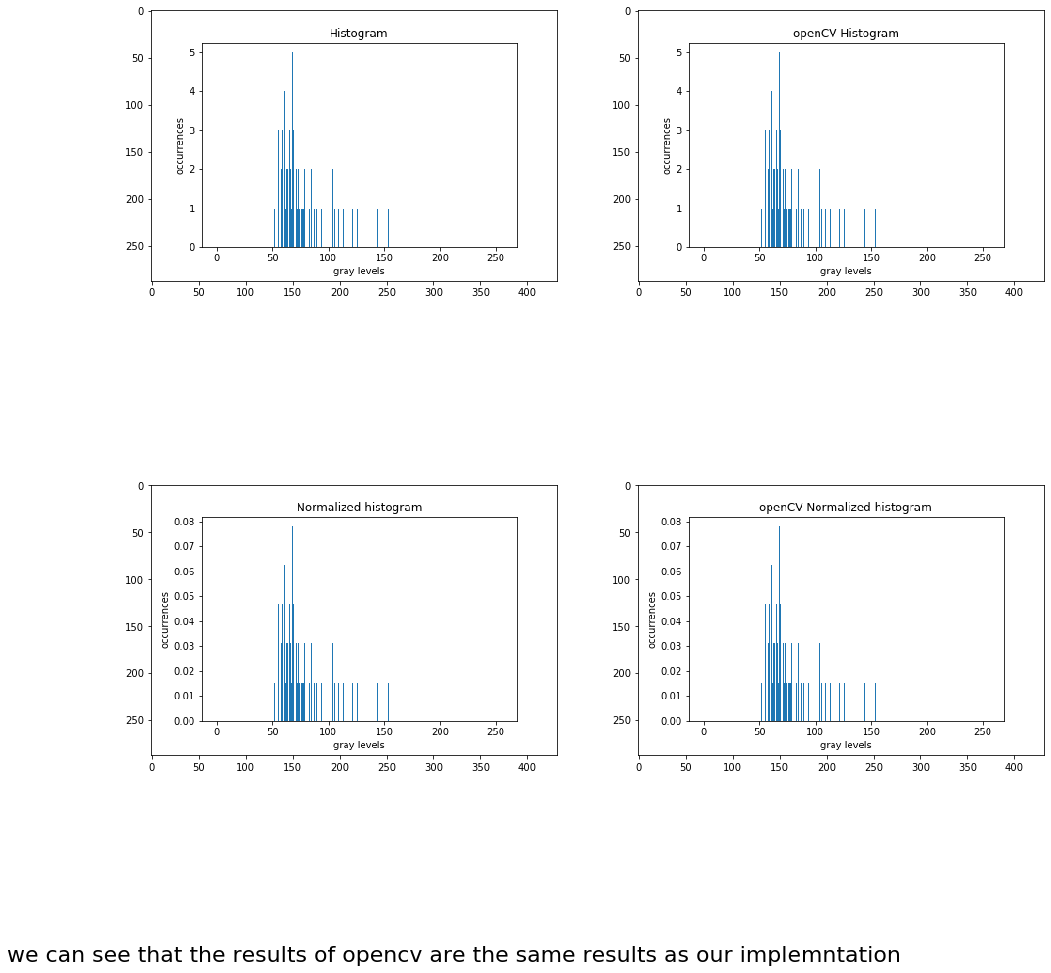

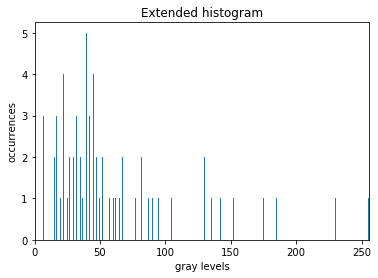

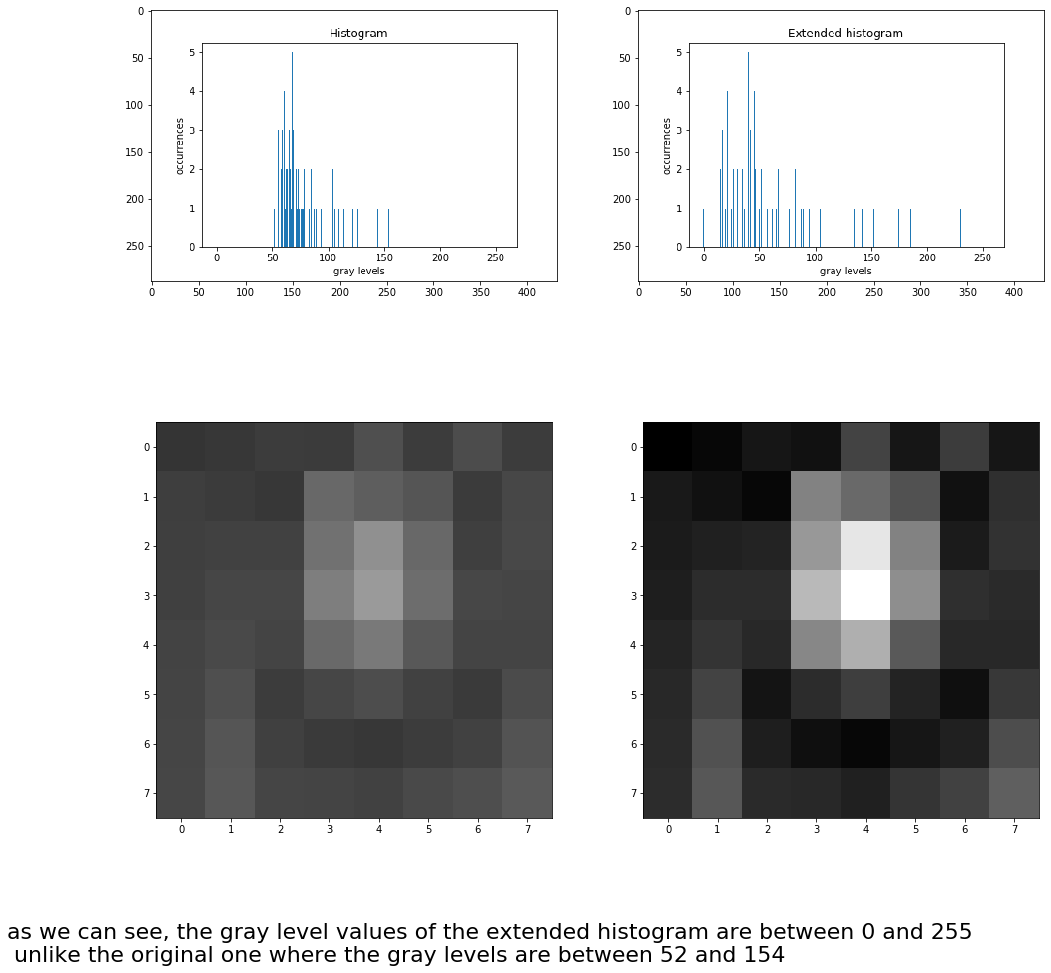

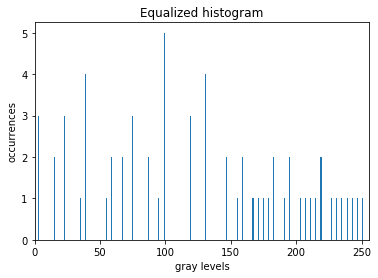

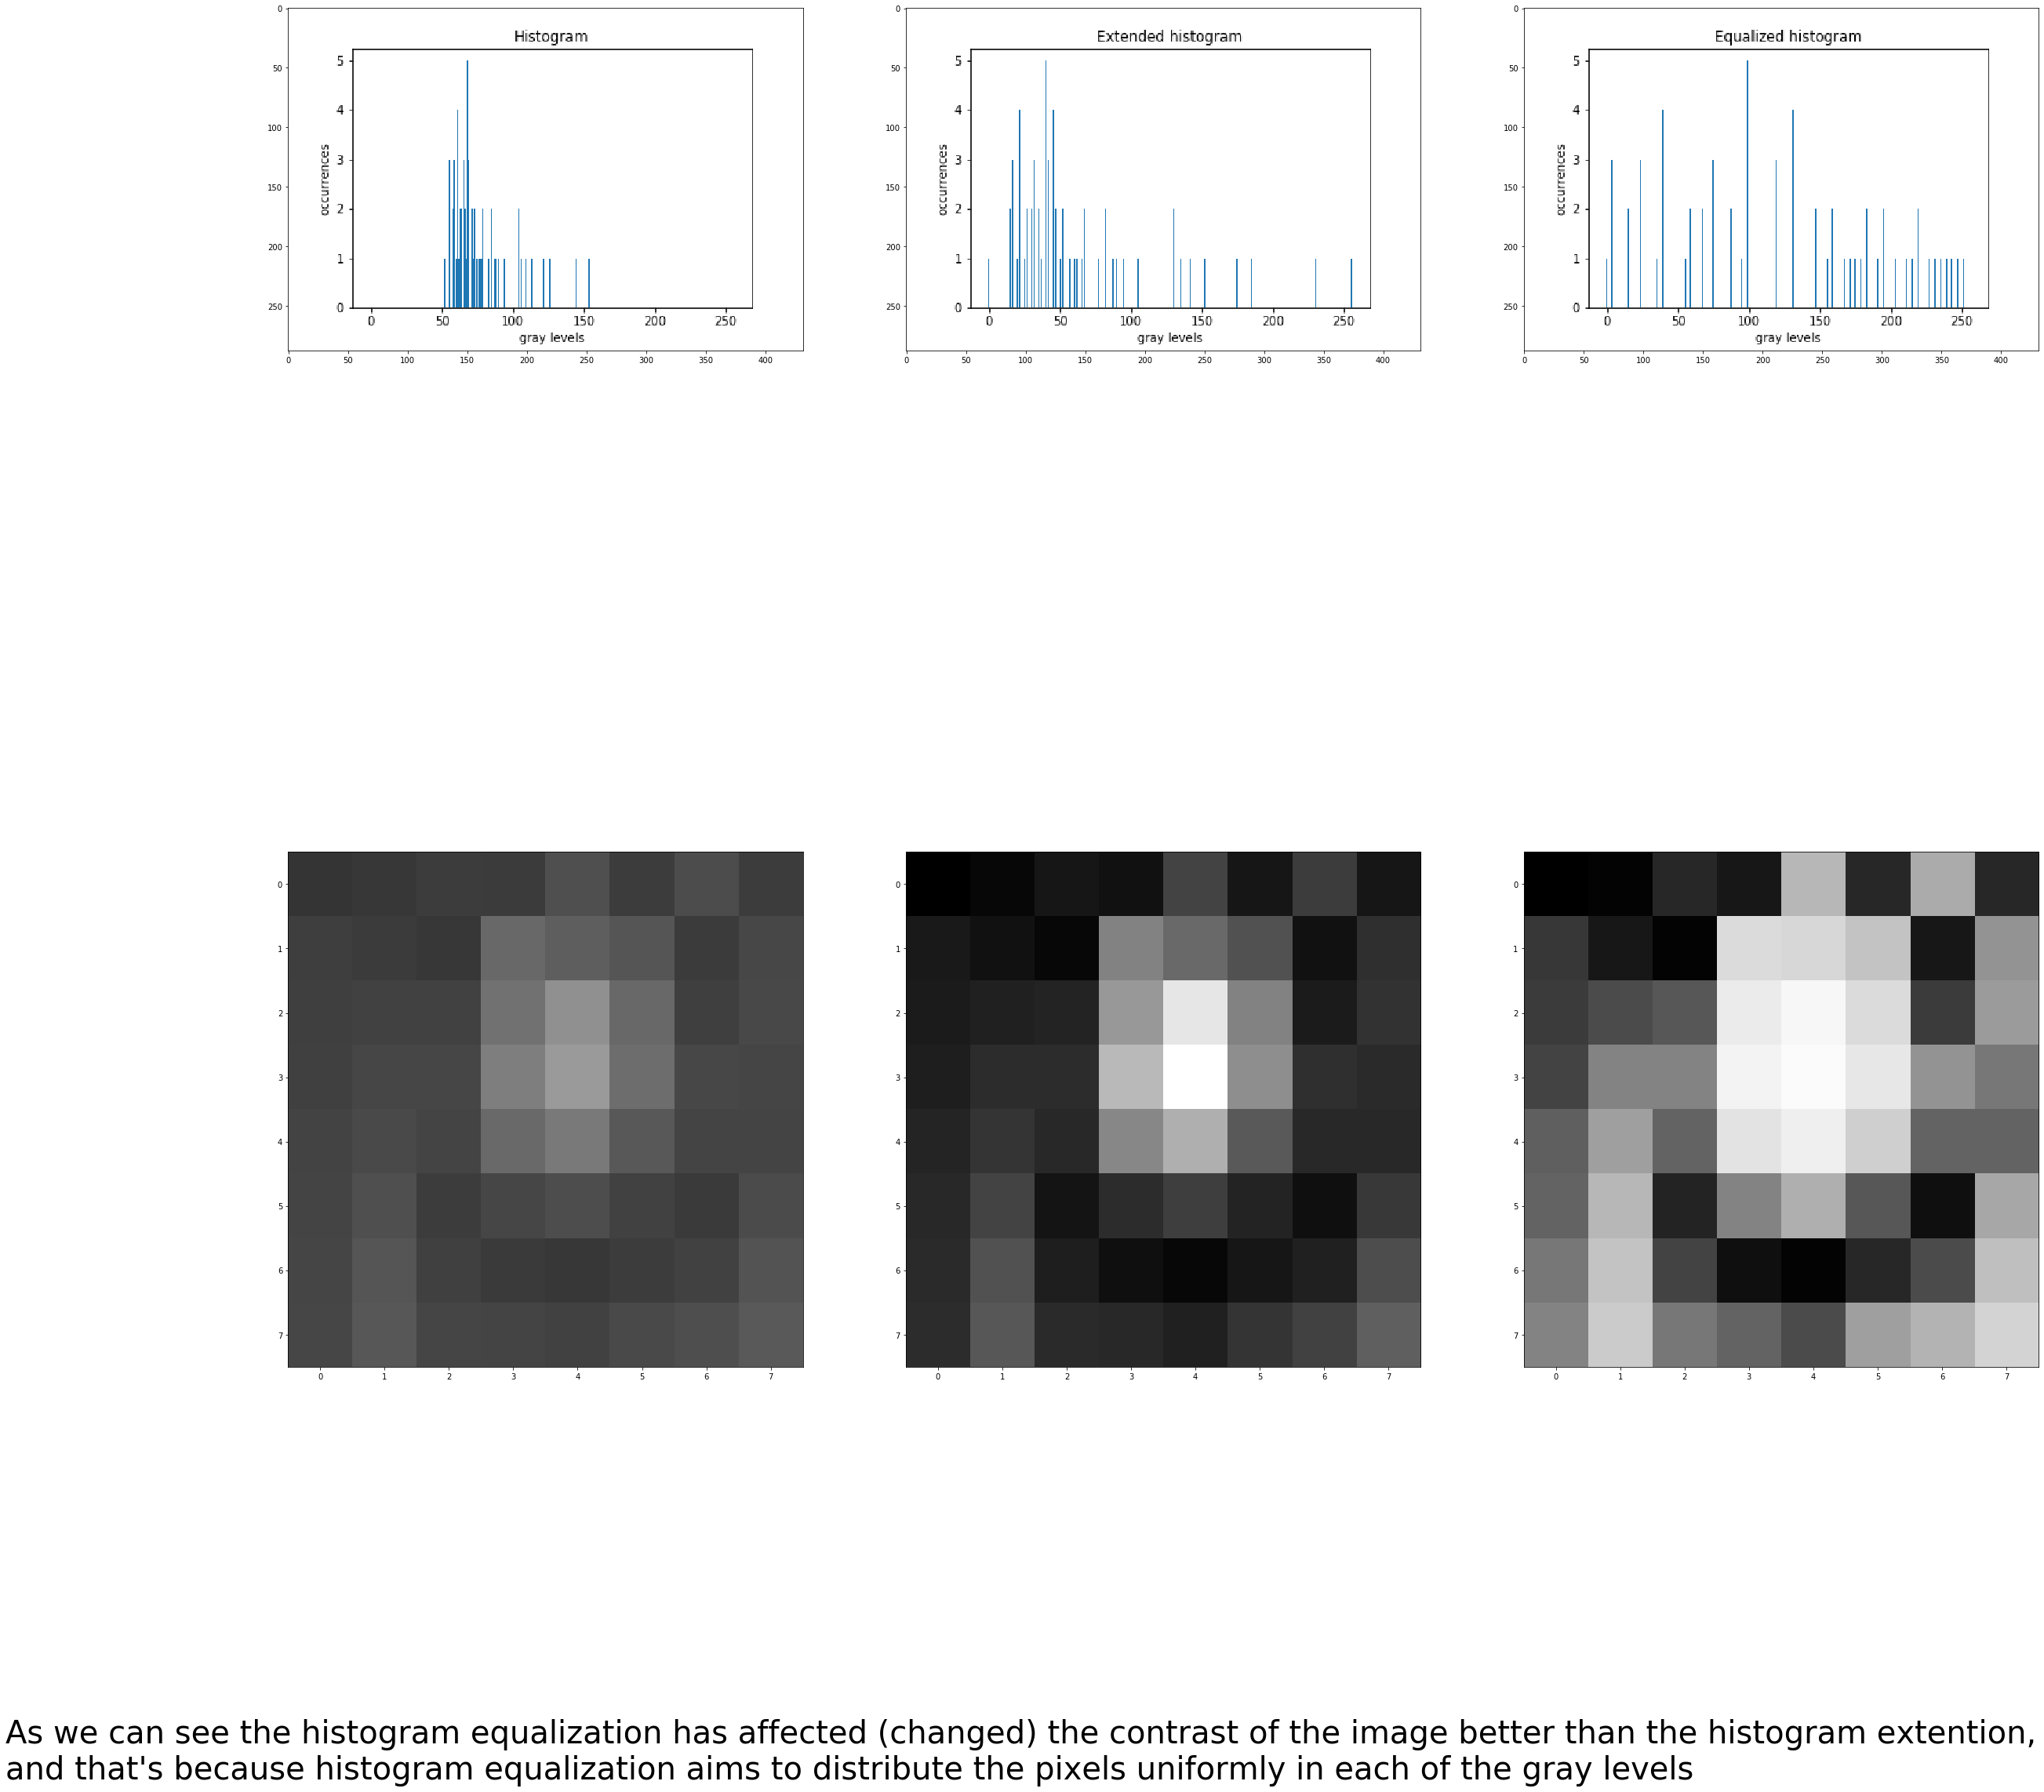

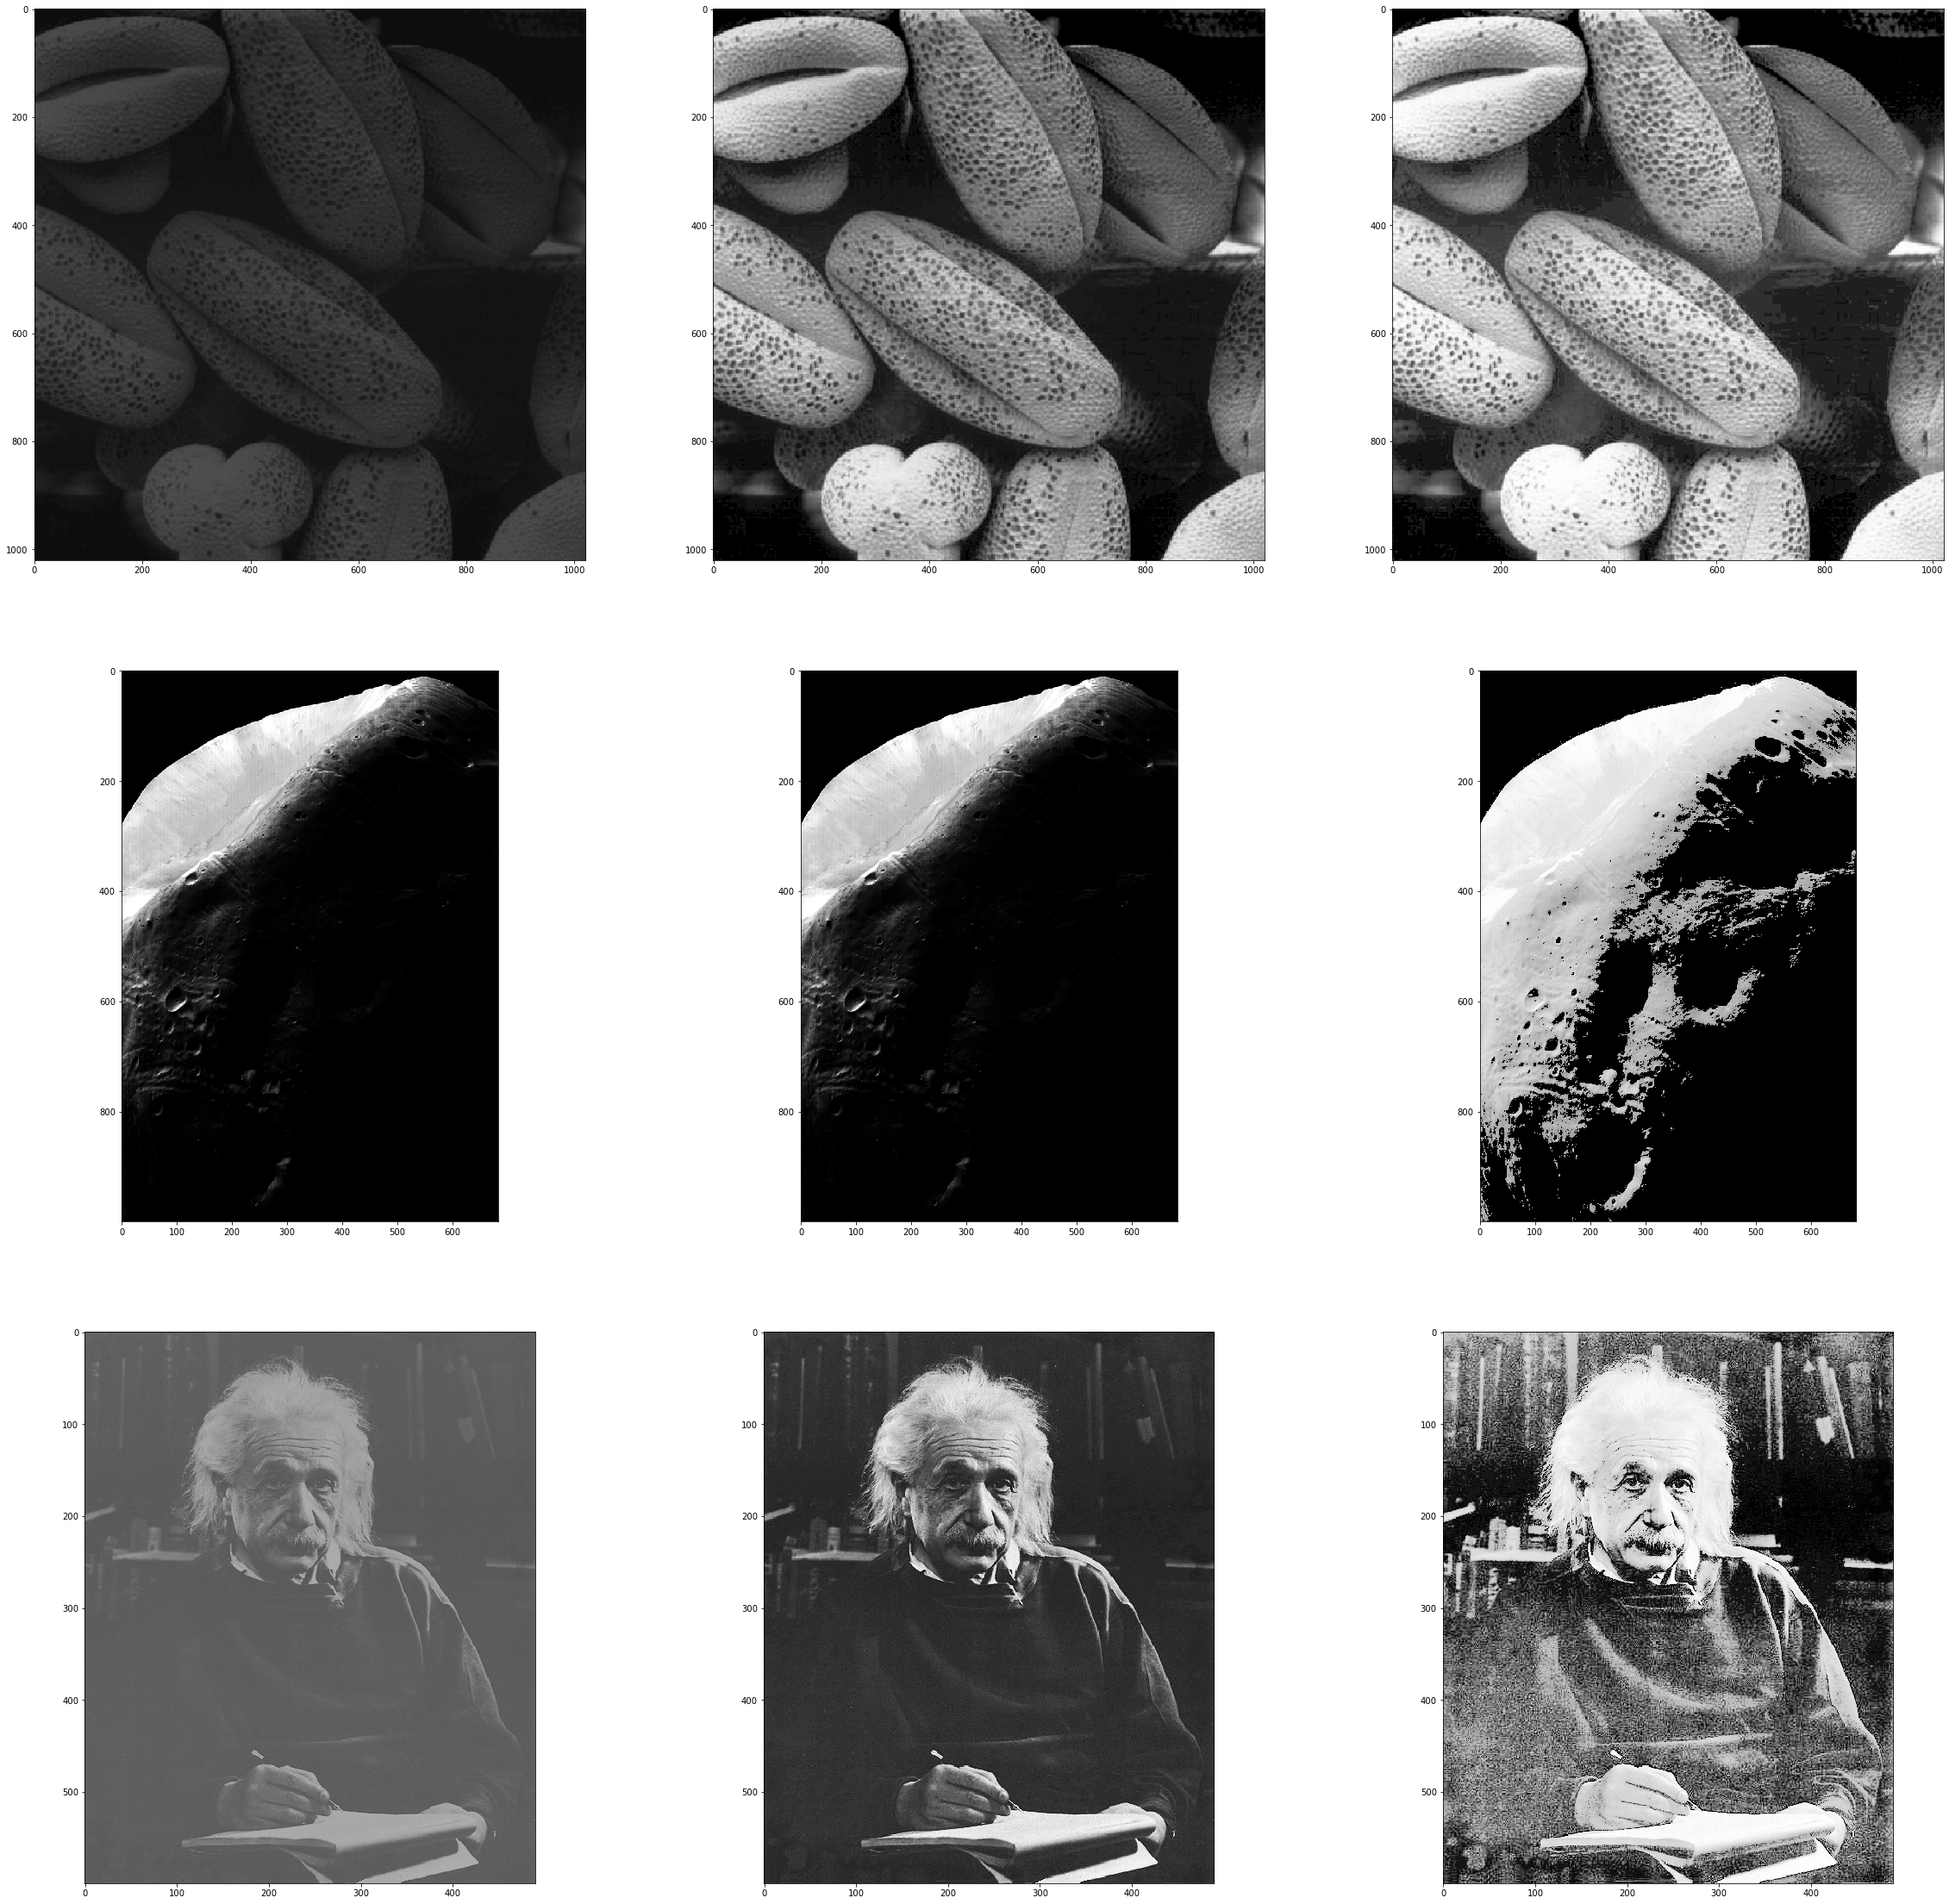

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

#the function which is gonna be used to display and save the images (histograms).
def displayHist(**myArgs):
    plt.figure()
    plt.title(myArgs['title'])
    plt.xlabel('gray levels')
    plt.ylabel('occurrences')
    plt.bar(myArgs['x'],myArgs['y'])
    plt.savefig(myArgs['imgName'])
    plt.xlim([0, 256])

#the function which is gonna display a set of images side by side (in order to compare them).
def showImages(**myArgs):
    images = myArgs['images']
    lines = int(myArgs['lines'])
    columns = int(myArgs['columns'])
    height = int(myArgs['height'])
    width = int(myArgs['width'])
    fontsize = int(myArgs['fontsize'])
    text = myArgs['text']
    f, axarr = plt.subplots(lines,columns)
    f.set_figheight(height)
    f.set_figwidth(width)
    f.text(0,0,text,fontsize=fontsize)
    i=0
    for line in range(0,lines):
        for column in range(0,columns):
            axarr[line,column].imshow(plt.imread(images[i]))
            i+=1

#the function which is gonna be used to give us the extended image (used for to improve the contrast of the given 3 photos).
def extendMyImage(**myArgs):
        #reading the image & getting the min & the max.
    fig = plt.imread(myArgs['initFname'])
    figMax=fig.max()
    figMin=fig.min() 
        #The extended image is calculated as follows: [(I(i,j) - Lmin)/(Lmax - Lmin)]*255.
    extendedFig = []
    for i in range(0,fig.shape[0]):
        temp = [] #will contain the lines of the extended image.
        for j in range(0,fig.shape[1]):
            elt = int(((fig.item(i,j) - figMin) / (figMax - figMin)) * 255) #[(I(i,j) - Lmin)/(Lmax - Lmin)]*255.
            temp.append(elt) #to add the extended pixel to the line of the extended image.
        extendedFig.append(temp) #to add the line into the matrix of the extended image.
    extendedFig = np.array(extendedFig) #converting the list to a numpy array.
    plt.imsave(myArgs['resultFname'], extendedFig, cmap='gray',vmin=0,vmax=255)

#the function which is gonna be used to give us the equalized image (used for the improvement of the 3 photos).
def equalizeMyImage(**myArgs):
    fig = plt.imread(myArgs['initFname'])
    max = fig.max()
        #Calculating the normalized histogram then the normalized cumulated histogram of the first image.
    figPixels = []
    figOccurrences = [0] * 256
    for i in range(0,256):
        figPixels.append(i)
        #Constructing the histogram of the image.
    for i in range(0,fig.shape[0]):
        for j in range(0,fig.shape[1]):
            figOccurrences[int(fig.item(i,j))] = figOccurrences[int(fig.item(i,j))] +1
        #Constructing the normalized histogram of the image.
    figNormalizedOccurrences = []
    for i in range(0,len(figOccurrences)):
        figNormalizedOccurrences.append(figOccurrences[i] / (fig.shape[0] * fig.shape[1]))
        #Constructing the normalized cumulated histogram.
    figCumulatedNormalizedOccurrences = [0] * 256
    for i in range(1,max+1):
        for j in range(0,i):
            figCumulatedNormalizedOccurrences[i] += figNormalizedOccurrences[j]
        
        #Equalized image.
    equalizedfig = []
    for i in range(0,fig.shape[0]):
        temp=[] #will contain the elements (pixels) of the line i of the equalized image.
        for j in range(0,fig.shape[1]):
            temp.append(int(figCumulatedNormalizedOccurrences[int(fig.item(i,j))] * 255)) #F'(x,y) = C[F(x,y)]*255.
        equalizedfig.append(temp) #to add the line i into the equalized image.
    equalizedfig = np.array(equalizedfig)
    plt.imsave(myArgs['resultFname'], equalizedfig, cmap='gray',vmin=0,vmax=255)


#reading the image.
image = np.genfromtxt('image.csv', delimiter=';')
#displaying the image.
plt.figure()
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title('original image')
plt.imsave("originalImage.png", image, cmap='gray',vmin=0,vmax=255)
#first we should extract the height and the width of the image because we gonna need them a lot. 
imageHeight = image.shape[0]
imageWidth = image.shape[1]
#Calculating the metrixs on the image.
    #image luminance: we can get it directly using the built in function np.mean(image).
    #first we calculate the sum of the image elements.
    #we can do that using the built in function np.sum(image) which will give us the same exact result.
elementsSum=0
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        elementsSum += image.item(i,j)
    #calculating the luminance by dividing the sum by the definition of the image.
luminance = int(elementsSum / (imageHeight * imageWidth))
#displaying the result.
print("luminance = "+str(luminance))

#calculating and displaying the image dynamics.
max = 0
min = 255
    #we gonna cycle through the elemnts of the matrix in order to find the min and the max values
    #or we can use the built in functions np.amin(image) and np.amax(image) to get the values directly.
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        if(image.item(i,j) > max ) : max=int(image.item(i,j)) #updating the value of the max.
        if(image.item(i,j) < min ) : min=int(image.item(i,j)) #updating the value of the min.
print("dynamic = ["+str(min)+" , "+str(max)+"]")

#calculating and displaying the image contrast.
imageContrast = round((max - min) / (max + min),3)
print("image contarst = "+str(imageContrast))

#Calculating and displaying the standard deviation of the gray levels.
    #first we gonna calculate the following sum : (I(x,y) - moy)^2 then we devide it by the definition of the image
    #or we can use the built in function np.std(image) which will give us the same result.
standardDeviationSum =0
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        standardDeviationSum += (int(image.item(i,j))-luminance) ** 2 
standardDeviation = round(math.sqrt(standardDeviationSum / (imageHeight * imageWidth)),3)
print("standard deviation using the formula which is given in the class = "+str(round(standardDeviationSum / (imageHeight * imageWidth),3)))
print("standard deviation adding the square root to the given class formula = "+str(standardDeviation))
print("standard deviation using the built in function = "+str(round(np.std(image),3)))
#Histogram and cumulated histogram.
    #Constructing and displaying the histogram of the image.
pixels = []
occurrences = [0] * 256
for i in range(0,256):
  pixels.append(i)

for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        occurrences[int(image.item(i,j))] = occurrences[int(image.item(i,j))] +1
displayHist(title = 'Histogram', x = pixels, y = occurrences, imgName = 'imageHistogram.png')

    #Constructing and displaying the normalized histogram of the image.
normalizedOccurrences = []
for i in range(0,len(occurrences)):
    normalizedOccurrences.append(occurrences[i] / (imageHeight * imageWidth))
displayHist(title = 'Normalized histogram', x = pixels, y = normalizedOccurrences, imgName = 'imageNormalizedHistogram.png')

#Constructing and displaying the cumulated histogram of the image as well as its normalized cumulated histogram.
    #Constructing and displaying the cumulated histogram of the image.
cumulatedOccurrences = [0] * 256
for i in range(0,256):
    for j in range(0,i):
        cumulatedOccurrences[i] += occurrences[j]
displayHist(title = 'Cumulated histogram', x = pixels, y = cumulatedOccurrences, imgName = 'imageCumulatedHistogram.png')

    #Constructing and displaying the normalized cumulated histogram.
cumulatedNormalizedOccurrences = [0] * 256
for i in range(0,256):
    for j in range(0,i):
        cumulatedNormalizedOccurrences[i] += normalizedOccurrences[j]
displayHist(title = 'Normalized cumulated histogram', x = pixels, y = cumulatedNormalizedOccurrences, imgName = 'imageCumulatedNormalizedHistogram.png')

#calculating the histograms using opencv functions.
    #histogram.
image1= image.astype('uint8')
cv2Hist = cv2.calcHist([image1], [0], None, [256], [0, 256])

cv2Occurrences=[]
for i in range(0,cv2Hist.shape[0]):
    cv2Occurrences.append(cv2Hist.item(i,0))
displayHist(title = 'openCV Histogram', x=pixels, y=cv2Occurrences, imgName = 'cv2ImageHistogram.png')
    #Normalized histogram.
cv2NormalisedOccurrences = cv2Occurrences/cv2Hist.sum()
displayHist(title = 'openCV Normalized histogram', x=pixels, y=cv2NormalisedOccurrences, imgName = 'cv2ImageNormalizedHistogram.png')
    #comparision
imagesList=['imageHistogram.png','cv2ImageHistogram.png','imageNormalizedHistogram.png','cv2ImageNormalizedHistogram.png']
showImages(images=imagesList,lines='2',columns='2',height='16',width='16',text='we can see that the results of opencv are the same results as our implemntation',fontsize='22')

#Extending the histogram and displaying the resulting image.
    #The extended image is calculated as follows: [(I(i,j) - Lmin)/(Lmax - Lmin)]*255.
extendedImage = []
for i in range(0,imageHeight):
    temp = [] #will contain the lines of the extended image.
    for j in range(0,imageWidth):
        elt = int(((image.item(i,j) - min) / (max - min)) * 255) #[(I(i,j) - Lmin)/(Lmax - Lmin)]*255.
        temp.append(elt) #to add the extended pixel to the line of the extended image.
    extendedImage.append(temp) #to add the line into the matrix of the extended image.
extendedImage = np.array(extendedImage) #converting the list to a numpy array.
plt.imsave("extendedImage.png", extendedImage, cmap='gray',vmin=0,vmax=255) #to save the extended image so we can display it later.


#Constructing and displaying the extended histogram of the image.
extendedOccurrences = [0] * 256
for i in range(0,imageHeight):      #since the original image and the extended image has the same definition,
    for j in range(0,imageWidth):   #we can use the height and the width of the original image. 
        extendedOccurrences[int(extendedImage.item(i,j))] = extendedOccurrences[int(extendedImage.item(i,j))] +1
displayHist(title = 'Extended histogram', x = pixels, y = extendedOccurrences, imgName = 'extendedImageHistogram.png')

#displaying the original image and the extended one along side with both hsitograms.
    #histograms -> images.
imagesList=['imageHistogram.png','extendedImageHistogram.png','originalImage.png','extendedImage.png']
showImages(images=imagesList,lines='2',columns='2',height='16',width='16',text='as we can see, the gray level values of the extended histogram are between 0 and 255 \n unlike the original one where the gray levels are between 52 and 154',fontsize='22')

#histogram equalization.
    #Equalized image.
equalizedImage = []
for i in range(0,imageHeight):
    temp=[] #will contain the elements (pixels) of the line i of the equalized image.
    for j in range(0,imageWidth):
        temp.append(int(cumulatedNormalizedOccurrences[int(image.item(i,j))] * 255)) #F'(x,y) = C[F(x,y)]*255.
    equalizedImage.append(temp) #to add the line i into the equalized image.
equalizedImage = np.array(equalizedImage)
plt.imsave("equalizedImage.png", equalizedImage, cmap='gray',vmin=0,vmax=255)
    
    #Equalized histogram.
equalizedOccurrences = [0] * 256
for i in range(0,imageHeight):      #since the original image and the extended image has the same definition,
    for j in range(0,imageWidth):   #we can use the height and the width of the original image. 
        equalizedOccurrences[int(equalizedImage.item(i,j))] = equalizedOccurrences[int(equalizedImage.item(i,j))] +1
displayHist(title = 'Equalized histogram', x = pixels, y = equalizedOccurrences, imgName = 'equalizedHistogram.png')

#displaying the original image and the extended one and the equalized image along side with the three hsitograms.
    #histograms -> images.
imagesList =['imageHistogram.png','extendedImageHistogram.png','equalizedHistogram.png','originalImage.png','extendedImage.png','equalizedImage.png']
showImages(images=imagesList,lines='2',columns='3',height='40',width='40',text='As we can see the histogram equalization has affected (changed) the contrast of the image better than the histogram extention,\nand that\'s because histogram equalization aims to distribute the pixels uniformly in each of the gray levels',fontsize='40')

#Improving the contrast of the given images using the histogram extention and equalization.
    #reading and saving the images as a .png .
fig1 = plt.imread('Fig0208(a).tif')
plt.imsave("fig1.png", fig1, cmap='gray',vmin=0,vmax=255)
fig2 = plt.imread('Fig0210(a).tif')
plt.imsave("fig2.png", fig2, cmap='gray',vmin=0,vmax=255)
fig3 = plt.imread('Fig0228(a).tif')
plt.imsave("fig3.png", fig3, cmap='gray',vmin=0,vmax=255)
    #Extending the images.
extendMyImage(initFname='Fig0208(a).tif', resultFname='extendedFig1.png')
extendMyImage(initFname='Fig0210(a).tif', resultFname='extendedFig2.png')
extendMyImage(initFname='Fig0228(a).tif', resultFname='extendedFig3.png')
    #Equalizing the images.
equalizeMyImage(initFname='Fig0208(a).tif', resultFname='equalizedFig1.png')
equalizeMyImage(initFname='Fig0210(a).tif', resultFname='equalizedFig2.png')
equalizeMyImage(initFname='Fig0228(a).tif', resultFname='equalizedFig3.png')
    #Displaying the three images.
imagesList=['fig1.png','extendedFig1.png','equalizedFig1.png','fig2.png','extendedFig2.png','equalizedFig2.png','fig3.png','extendedFig3.png','equalizedFig3.png']
showImages(images=imagesList,lines='3',columns='3',height='40',width='40',text='',fontsize='0')
